<a href="https://colab.research.google.com/github/tohver/Deep-Learning/blob/master/Monet_Renoir_or_Dali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install -Uqq fastbook
!pip install fastcore==1.0.9
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 2.8MB/s 
     |████████████████████████████████| 358kB 13.6MB/s 
     |████████████████████████████████| 1.0MB 15.1MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 40kB 4.8MB/s 
     |████████████████████████████████| 92kB 9.7MB/s 
     |████████████████████████████████| 40kB 5.0MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 2.6MB 20.9MB/s 
  Found existing installation: fastcore 1.0.13
    Uninstalling fastcore-1.0.13:
      Successfully uninstalled fastcore-1.0.13
Mounted at /content/gdrive


In [8]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [9]:
painter = 'monet', 'renoir', 'dali'
path = Path('artists')

In [10]:
# if not path.exists():
#   path.mkdir()
#   for i in painter:
#     dest = (path/i)
#     dest.mkdir(exist_ok = True)


In [11]:
Path.cwd()

Path('/content')

In [12]:
cd gdrive/My\ Drive/Colab\ Notebooks/artists/

/content/gdrive/My Drive/Colab Notebooks/artists


In [7]:
# the directories are there
# cd gdrive/My\ Drive/Colab\ Notebooks
# path.mkdir()
# for i in painter:
#     dest = (path/i)
#     dest.mkdir(exist_ok = True)

In [8]:
# count files in the directory
# import os

# img_folder_path = 'C:/FolderName/FolderName2/IMG/'
# dirListing = os.listdir(img_folder_path)

# print(len(dirListing))

In [13]:
Path.cwd()

Path('/content/gdrive/My Drive/Colab Notebooks/artists')

In [14]:
imagePath = Path.cwd()
# imagePath = Path.cwd()/'gdrive/My Drive/Colab Notebooks/artists'
imagePath

Path('/content/gdrive/My Drive/Colab Notebooks/artists')

In [15]:
fns = get_image_files(imagePath/'monet')
fns

(#594) [Path('/content/gdrive/My Drive/Colab Notebooks/artists/monet/d84ee89e65 (2).jpg'),Path('/content/gdrive/My Drive/Colab Notebooks/artists/monet/f36e10e142 (2).jpg'),Path('/content/gdrive/My Drive/Colab Notebooks/artists/monet/f9fb1eeed5 (2).jpg'),Path('/content/gdrive/My Drive/Colab Notebooks/artists/monet/c8ddc21e72 (2).jpg'),Path('/content/gdrive/My Drive/Colab Notebooks/artists/monet/992f83927a (2).jpg'),Path('/content/gdrive/My Drive/Colab Notebooks/artists/monet/8110416761 (2).jpg'),Path('/content/gdrive/My Drive/Colab Notebooks/artists/monet/d1fc1aba5c (2).jpg'),Path('/content/gdrive/My Drive/Colab Notebooks/artists/monet/3e83a04b19 (2).jpg'),Path('/content/gdrive/My Drive/Colab Notebooks/artists/monet/c9c480891c (2).jpg'),Path('/content/gdrive/My Drive/Colab Notebooks/artists/monet/b99df15d29 (2).jpg')...]

In [12]:
??verify_images

In [13]:
doc(verify_image)

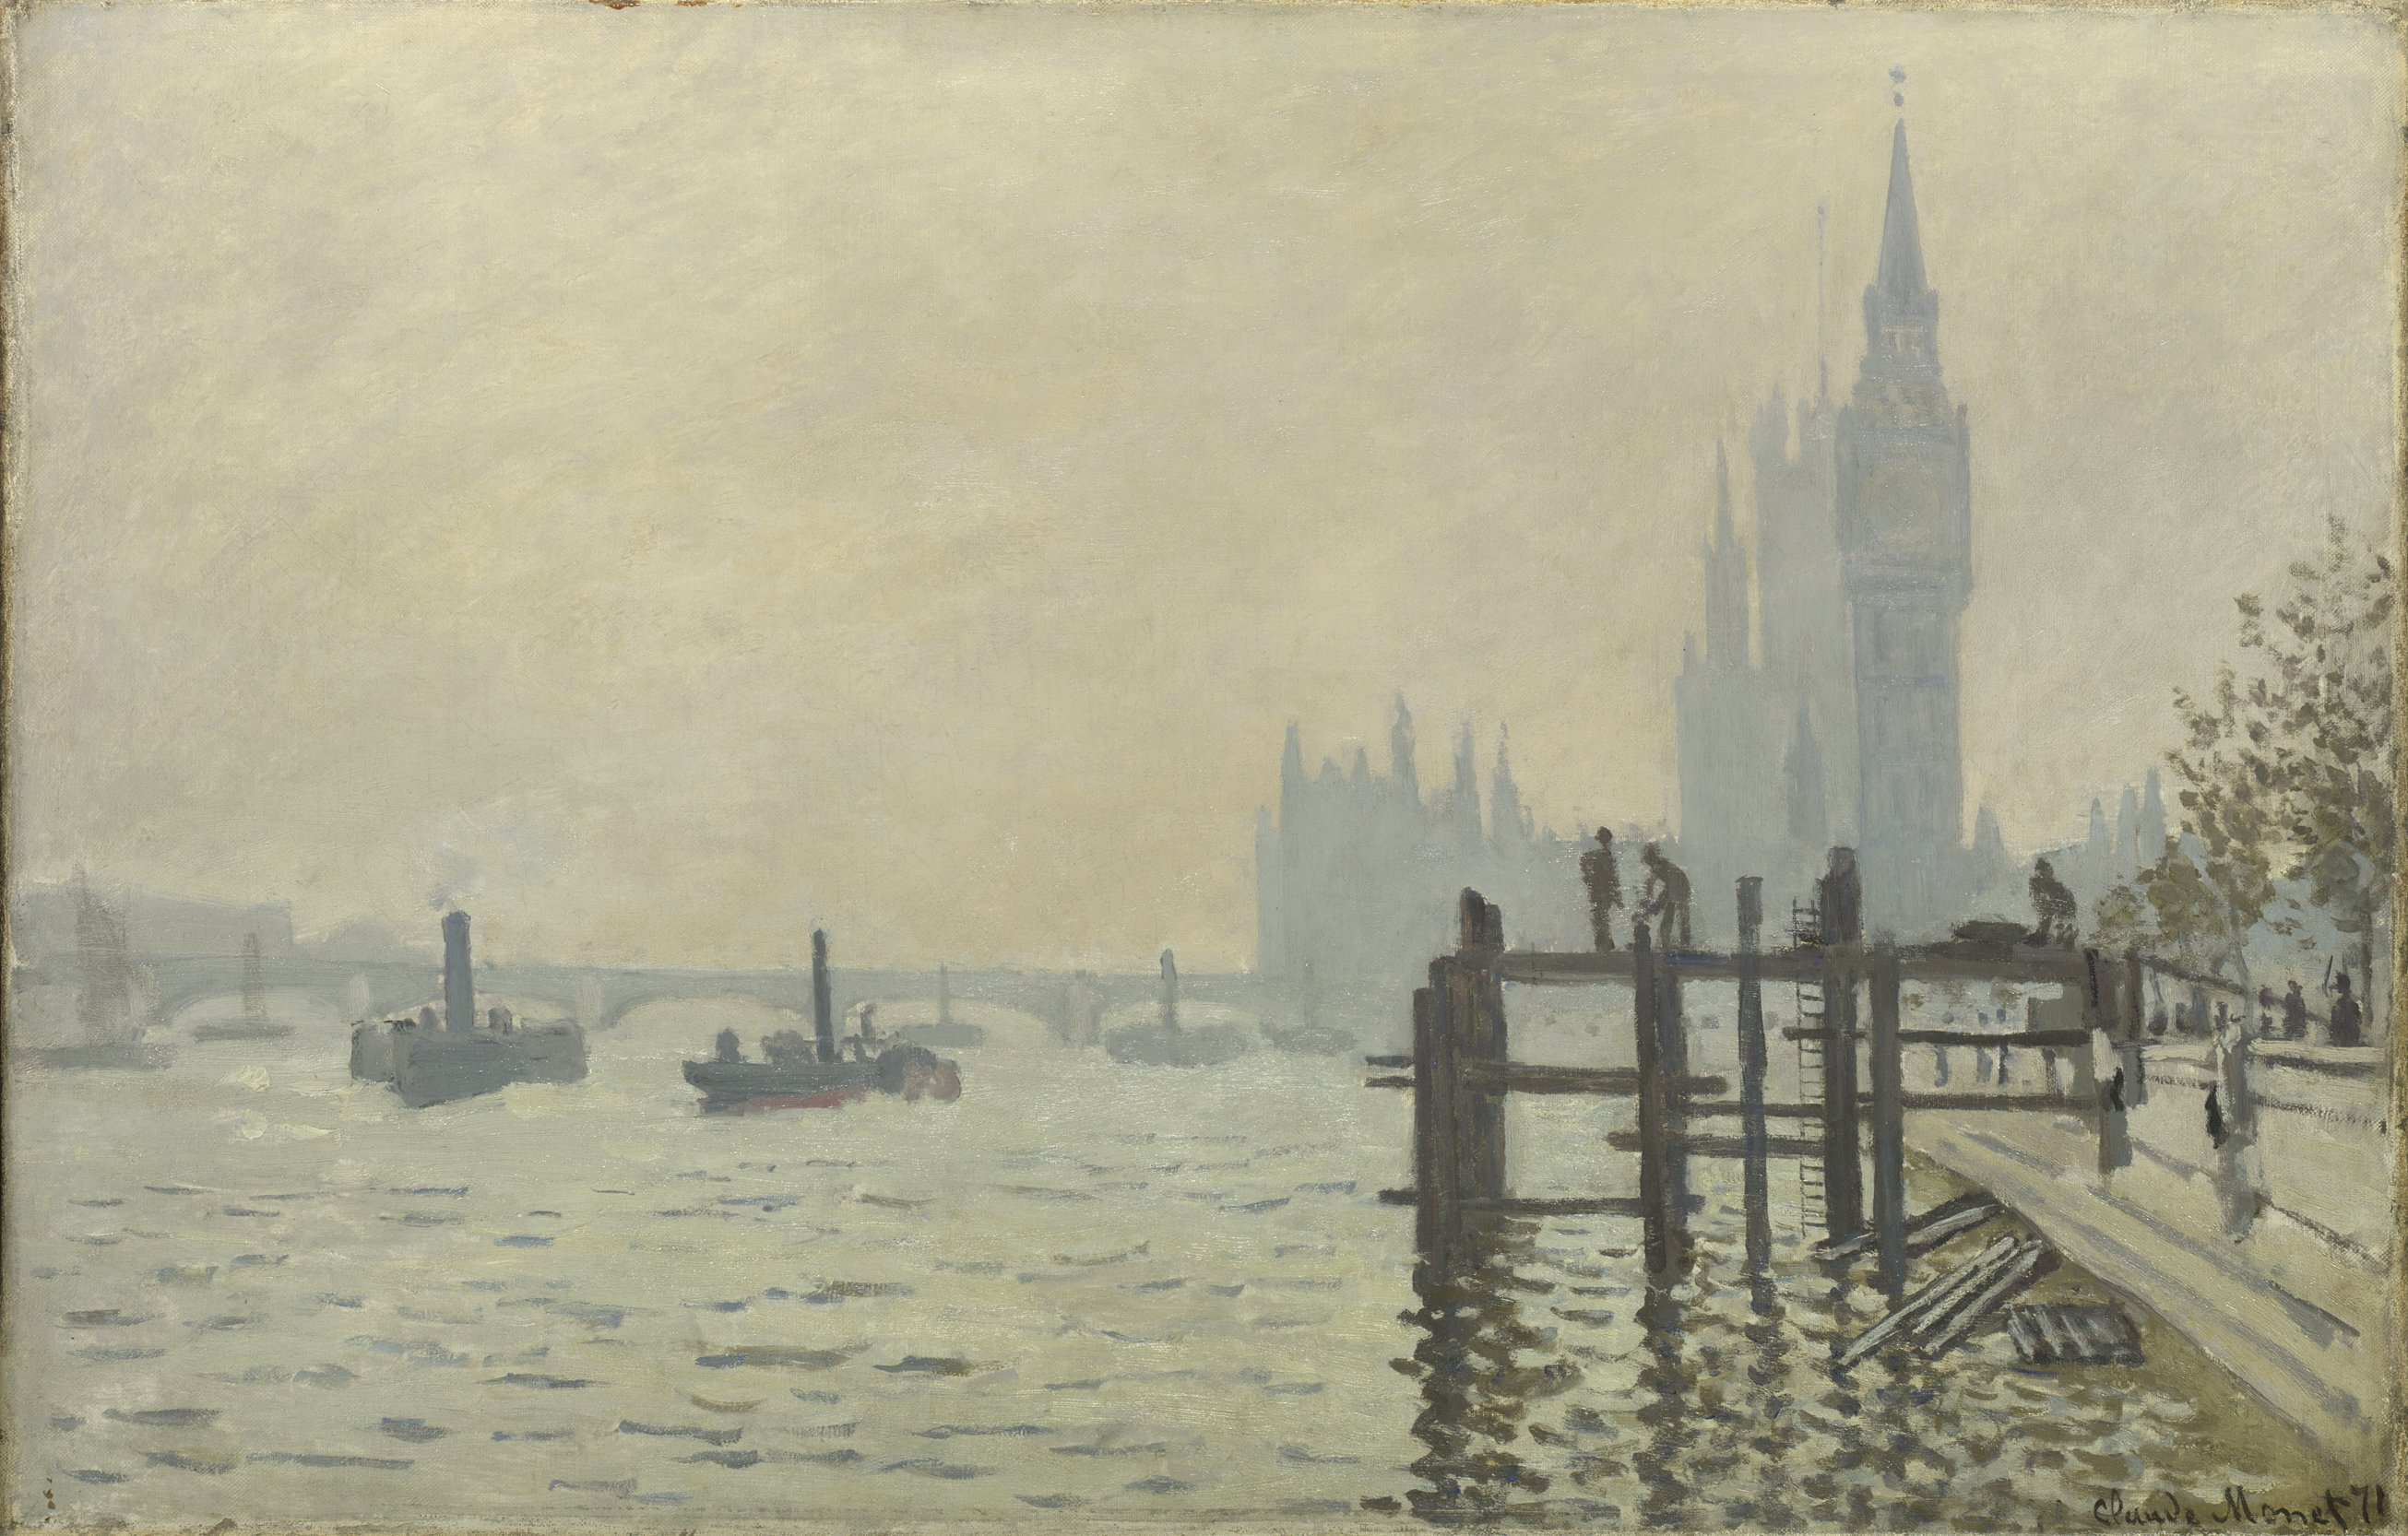

In [17]:
im = Image.open(fns[175])
im

In [18]:
paintings = DataBlock(
    blocks = (ImageBlock, CategoryBlock), 
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=.2, seed = 42),
    get_y = parent_label,
    item_tfms = Resize(128)
)

In [16]:
??get_image_files

In [17]:
??get_files

In [18]:
??parent_label

In [31]:
dls = paintings.dataloaders(Path.cwd())

In [32]:
imagePath

Path('/content/gdrive/My Drive/Colab Notebooks/artists')

In [23]:
# since error: image is truncated:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [35]:
dls.valid.show_batch()

KeyError: ignored

In [24]:
dls.valid.show_batch(max_n=4, nrows=1)

KeyError: ignored

In [23]:
# instead of truncating the images: squish/stretch them
paintings = paintings.new(item_tfms = Resize(128, ResizeMethod.Squish))
dls = paintings.dataloaders(imagePath)
dls.valid.show_batch(max_n=4, nrows = 1)

KeyError: ignored

In [ ]:
paintings = paintings.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode = 'zeros'))
dls = paintings.dataloaders(imagePath)
dls.valid.show_batch(max_n=4, nrows =1)

In [ ]:
paintings = paintings.new(item_tfms=RandomResizedCrop(128, min_scale=.3))
dls = paintings.dataloaders(imagePath)
dls.train.show_batch(max_n=4, nrows = 1, unique=True)

In [ ]:
#or: data augmentation
paintings = paintings.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = paintings.dataloaders(imagePath)
dls.train.show_batch(max_n=8, nrows = 2, unique = True)

## Train the Model + Clean the data

In [ ]:
# both croping and augmentation
paintings = paintings.new(
    item_tfms = RandomResizedCrop(224, min_scale=.5),
    batch_tfms = aug_transforms()
)
dls = paintings.dataloaders(imagePath)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(9)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
# why the number of images in validation set is so different for each painter?

In [ ]:
interp.plot_top_losses(10, nrows = 2)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
dls = paintings.dataloaders(imagePath)
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(11)

In [ ]:
learn.export()

In [36]:
path = Path()
path.ls(file_exts = '.pkl')

(#1) [Path('export.pkl')]

In [37]:
learn_inf = load_learner(path/'export.pkl')

In [38]:
inference = learn_inf.predict(Path.cwd()/'000007.jpg')
inference

('monet', tensor(1), tensor([0.0018, 0.9963, 0.0019]))

In [39]:
learn_inf.dls.vocab

(#3) ['dali','monet','renoir']

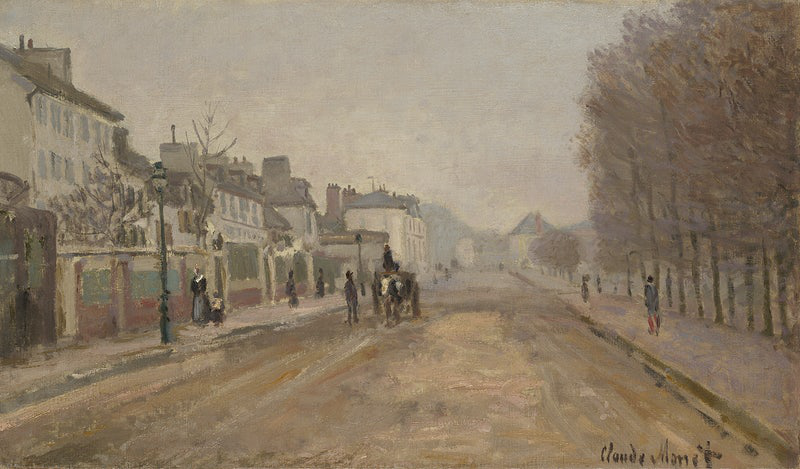

In [34]:
im = Image.open(Path.cwd()/'000007.jpg')
im

In [40]:
print(f"Who painted this picture?\n{learn_inf.dls.vocab[0].capitalize()} with the probability of {inference[2][0]*100:.2f}%\n{learn_inf.dls.vocab[1].capitalize()} with the probability of {inference[2][1]*100:.2f}%\n{learn_inf.dls.vocab[2].capitalize()} with the probability of {inference[2][2]*100:.2f}%")

Who painted this picture?
Dali with the probability of 0.18%
Monet with the probability of 99.63%
Renoir with the probability of 0.19%


# Deploy

In [41]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

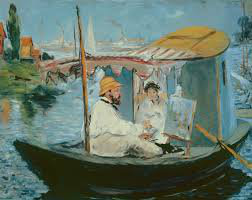

In [43]:
img = PILImage.create(btn_upload.data[-1])
img

In [59]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [45]:
pred, pred_idx, probs = learn_inf.predict(img)

In [48]:
lbl_pred = widgets.Label()
lbl_pred.value = f'This is a picture of {pred.capitalize()} with  the probability of {probs[pred_idx]:.4f} '  
lbl_pred

Label(value='This is a picture of Monet with  the probability of 1.0000 ')

In [53]:
btn_run = widgets.Button(description = "Classify")
btn_run

Button(description='Classify', style=ButtonStyle())

In [60]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128,128))
  pred, pred_idx, probs = learn_inf.predict(img)
  lbl_pred.value = f'It is a painting of {pred.capitalize()}, probability: {probs[pred_idx]:.4f}'
btn_run.on_click(on_click_classify)

In [61]:
#hide
btn_upload = widgets.FileUpload()
#hide_output
VBox([widgets.Label('Select the image!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [64]:
#hide
!pip install voila

In [65]:
!jupyter serverextension enable voila —sys-prefix

Enabling: voila
- Writing config: /root/.jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
Enabling: —sys-prefix
- Writing config: /root/.jupyter
    - Validating...
Error loading server extension —sys-prefix
      X is —sys-prefix importable?


Niedoskonałości tego modelu:
Dlaczego nie na leży go brać poważnie
1. Zastosowanie praktyczne: jeśli nakarmimy go wszystkimi dziełami danych malarzy: po prostu się ich nauczy
Z drugiej strony tutaj jest tylko niewielka część ich dzieł (np. monet: ok. 400 obrazów z przeszło 2000, niektóre tutaj na pewno są zdublowane)
2. Nie było dokładnej analizy of dataset: dzieła się powtarzaja, możliwe że to samo dzieło jest zarówno w train jak i valid set
